# Regresija


_Regresija_ je provlačenje funkcije $f$ koja ovisi o $n$ parametara kroz točke $(x_i,y_i)$, $i=1,2,\ldots, m$, pri čemu je $m>n$, tako da se _minimizira norma odstupanja_:

$$
\| f(x_i)-y_i\|_{1,2,\infty}\to \min.
$$

Regresija u _smislu najmanjih kvadrata_ je

$$
\| f(x_i)-y_i\|_{2}\to \min.
$$

Kada je funkcija $f$ pravac,

$$ 
f(x)=kx+l,
$$

radi se o _linearnoj regresiji_. U tom slučaju dobije se sustav linearnih jednadžbi

$$
k x_i + l=y_i, \quad i=1,2,\ldots,m.
$$

Ukoliko sve točke _ne leže na istom pravcu_, sustav nije rješiv pa se računa kvadratična prilagodba.

## Primjer

Provucimo pravac kroz točke $(x_i,y_i)$, $i=1,\ldots,m$, i izračunajmo kvalitetu prilagodbe. 

In [1]:
n=5
x=collect([1,2,4,6,7])
y=collect([1,3,2,4,3])
A=[x ones(5)]

5×2 Array{Float64,2}:
 1.0  1.0
 2.0  1.0
 4.0  1.0
 6.0  1.0
 7.0  1.0

In [2]:
# Koeficijenti
kl=A\y

2-element Array{Float64,1}:
 0.30769230769230765
 1.3692307692307688 

In [4]:
# Nacrtajmo točke i pravac
using Gadfly

In [5]:
xx=range(0,stop=8,length=100)
yy=kl[1].*xx.+kl[2]

1.3692307692307688:0.02486402486402486:3.83076923076923

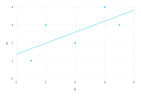

In [6]:
plot(layer(x=x,y=y),layer(x=xx,y=yy,Geom.line))

In [7]:
# Kvaliteta prilagodbe
using LinearAlgebra
q=sqrt(norm(A*kl-y)/norm(y))

0.5147667768205637

## Primjer - Kvadratična regresija

Kroz točke možemo provući i kvadratni polinom $y=ax^2+bx+c$. Ukoliko sve točke ne leže na istoj paraboli, sustav linearnih jednadžbi 

$$
ax_i^2+bx_i+c=y_i, \quad i=1,\ldots,m,
$$

nije rješiv pa računamo kvadratičnu prilagodbu. 

In [8]:
n=5
x=collect([1,2,4,5,6])
y=collect([0,1,4,8,14])
A=[x.^2 x ones(n)]

5×3 Array{Float64,2}:
  1.0  1.0  1.0
  4.0  2.0  1.0
 16.0  4.0  1.0
 25.0  5.0  1.0
 36.0  6.0  1.0

In [9]:
# Koeficijenti polinoma
abc=A\y

3-element Array{Float64,1}:
  0.6899350649350633
 -2.1607142857142745
  1.8636363636363449

In [10]:
# Nacrtajmo točke i parabolu
xx=range(0,stop=7,length=100)
yy=abc[1]*(xx.^2)+abc[2]*xx.+abc[3]

100-element Array{Float64,1}:
  1.8636363636363449
  1.7143079092114726
  1.5718781014924095
  1.4363469404791553
  1.3077144261717106
  1.1859805585700753
  1.071145337674249 
  0.963208763484232 
  0.8621708360000242
  0.7680315552216255
  0.6807909211490362
  0.6004489337822561
  0.5270055931212854
  ⋮                 
 15.130751964085285 
 15.588504419771626 
 16.053155522163774 
 16.524705271261727 
 17.0031536670655   
 17.488500709575078 
 17.980746398790455 
 18.479890734711653 
 18.985933717338664 
 19.498875346671472 
 20.01871562271009  
 20.545454545454525 

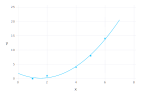

In [11]:
plot(layer(x=x,y=y),layer(x=xx,y=yy,Geom.line))

In [12]:
# Kvaliteta prilagodbe
q=sqrt(norm(A*abc-y)/norm(y))

0.23696295042459756

## Primjer - Rast svjetske populacije

Dosadašnji rast populacije (u milionima) da je u sljedećoj tablici (vidi http://en.wikipedia.org/wiki/World_population ). 

$$
\begin{array}{c|c|c|c|c|c|c|c|c|c}
\textrm{godina} & 1750 & 1800 & 1850 & 1900 & 1950 & 1999 & 2008 & 2010 & 2012 \\ \hline
\textrm{populacija (milijuni)} & 791 & 978 & 1262 & 1650 & 2521 & 5978 & 6707 & 6896 & 7052 
\end{array}
$$




Aproksimirajmo rast populacije eksponencijalnom funkcijom 

$$
P(t)=Ce^{kt}
$$

i predvidimo populaciju 2050. godine.

Sustav jednadžbi 

$$
Ce^{kt_i}=P_i, \quad i=1,2,\ldots, 9
$$

logaritmiranjem prelazi u sustav linearnih jednadžbi

$$
k \,t_i + \ln C =\ln P_i.
$$

Sve točke ne leže na istoj krivulji pa sustav nije rješiv i računamo kvadratičnu prilagodbu.

In [13]:
n=9
t=collect([1750,1800,1850,1900,1950,1999,2008,2010,2012])
P=collect([791,978,1262,1650,2521,5978,6707,6896,7052])
A= [t ones(9)]
kC=A\log.(P)

2-element Array{Float64,1}:
  0.008834419929650809
 -9.055914228293918   

In [14]:
# Vrijednosti na krivulji
Pv=exp.(kC[2]).*exp.(kC[1].*t)

9-element Array{Float64,1}:
  604.4510245115797
  940.152075924994 
 1462.2953556581206
 2274.427469700024 
 3537.6029164763945
 5453.927176892081 
 5905.273182327283 
 6010.539738912149 
 6117.682762104567 

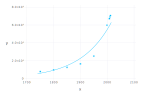

In [15]:
# Nacrtajmo točke i krivulju
tt=range(1740,stop=2015,length=200)
PP=exp.(kC[2]).*exp.(kC[1].*tt)
plot(layer(x=t,y=P),layer(x=tt,y=PP,Geom.line))

In [16]:
# predvidimo populaciju 2050 godine
P2050=exp(kC[2])*exp(kC[1]*2050)

8558.212502172595

Izračunata predikcija je manja od one u tablici. Ako se ograničimo na razdoblje od 1950 godine imamo:

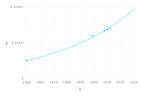

In [17]:
A= [t[5:end] ones(5)]
kC=A\log.(P[5:end])
tt=range(1950,stop=2030,200)
PP=exp.(kC[2]).*exp.(kC[1].*tt)
plot(layer(x=t[5:end],y=P[5:end]),layer(x=tt,y=PP,Geom.line))

In [18]:
P2050=exp(kC[2])*exp(kC[1]*2050)

13592.0770645014